In [4]:
import pandas as pd
df = pd.read_csv('../data/Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [6]:
# Convert the 'date_time' column from a string into a datetime object
df['date_time'] = pd.to_datetime(df['date_time'])

# Set this new datetime column as the index of our dataframe
# This makes plotting and analysis much easier
df.set_index('date_time', inplace=True)

# Check the first 5 rows again to see the new index
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [7]:
# Check the info again
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ MB


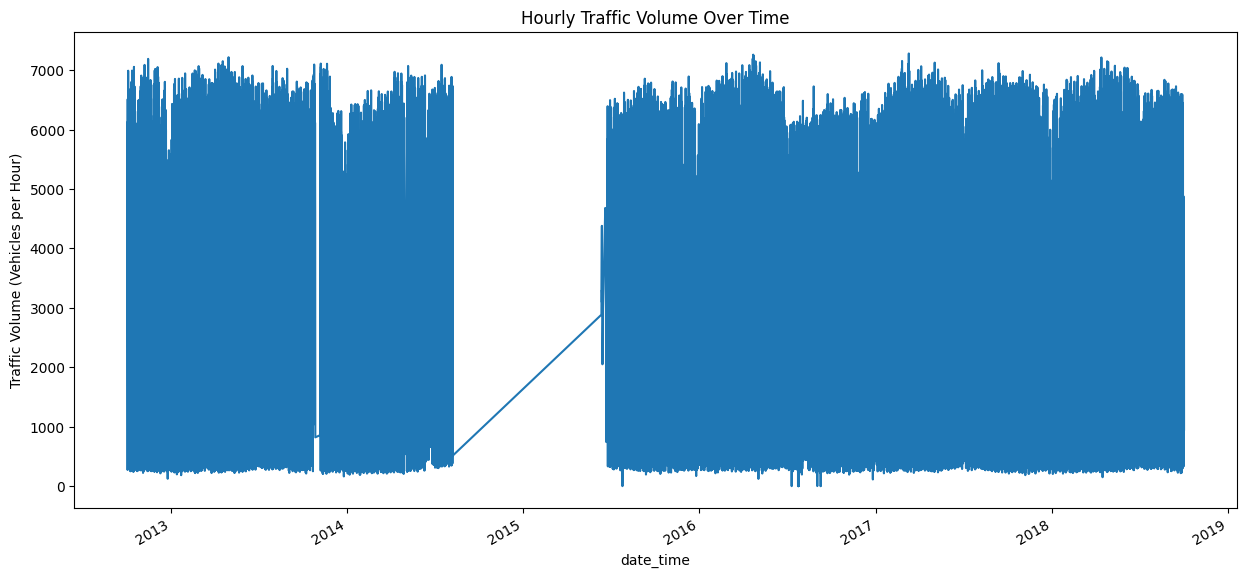

In [8]:
import matplotlib.pyplot as plt

# Plot the traffic_volume column
df['traffic_volume'].plot(figsize=(15, 7))

# Add a title and labels for clarity
plt.title('Hourly Traffic Volume Over Time')
plt.ylabel('Traffic Volume (Vehicles per Hour)')
plt.show()

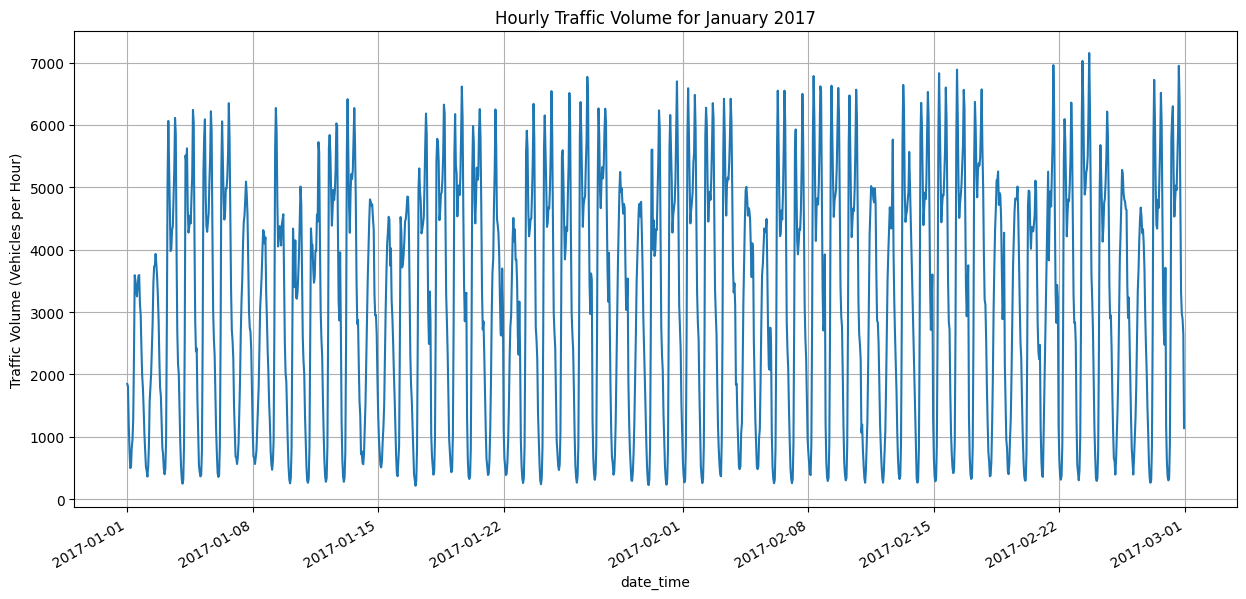

In [9]:
# Create a plot for a single month (e.g., January 2017)
df['2017-01':'2017-02']['traffic_volume'].plot(figsize=(15, 7))

# Add a more specific title and labels
plt.title('Hourly Traffic Volume for January 2017')
plt.ylabel('Traffic Volume (Vehicles per Hour)')
plt.grid(True) # Add a grid for easier reading
plt.show()

In [10]:
# Create new columns for hour, day of the week, and month
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

# Display the first 5 rows to see the new feature columns
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,hour,day_of_week,month
date_time,,,,,,,,,,,
2012-10-02 09:00:00,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,9,1,10
2012-10-02 10:00:00,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,4516,10,1,10
2012-10-02 11:00:00,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,11,1,10
2012-10-02 12:00:00,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,12,1,10
2012-10-02 13:00:00,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,4918,13,1,10


In [11]:
from sklearn.preprocessing import MinMaxScaler

# List of columns we want to scale
columns_to_scale = ['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'day_of_week', 'month']

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the first 5 rows to see the scaled data
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,hour,day_of_week,month
date_time,,,,,,,,,,,
2012-10-02 09:00:00,NaN,0.929726,0.0,0.0,0.40,Clouds,scattered clouds,0.761676,0.391304,0.166667,0.818182
2012-10-02 10:00:00,NaN,0.933209,0.0,0.0,0.75,Clouds,broken clouds,0.620330,0.434783,0.166667,0.818182
2012-10-02 11:00:00,NaN,0.933918,0.0,0.0,0.90,Clouds,overcast clouds,0.654808,0.478261,0.166667,0.818182
2012-10-02 12:00:00,NaN,0.935692,0.0,0.0,0.90,Clouds,overcast clouds,0.690385,0.521739,0.166667,0.818182
2012-10-02 13:00:00,NaN,0.938949,0.0,0.0,0.75,Clouds,broken clouds,0.675549,0.565217,0.166667,0.818182


In [12]:
import numpy as np

# We'll use the scaled data for creating sequences
data_scaled = df.values

# --- Create Sequences ---
X = []
y = []
sequence_length = 24  # Look back 24 hours

for i in range(sequence_length, len(data_scaled)):
    # The input sequence (X) is the last 24 hours of all features
    X.append(data_scaled[i-sequence_length:i, :])
    
    # The output (y) is the traffic_volume of the next hour
    # The 'traffic_volume' is the first column (index 0)
    y.append(data_scaled[i, 0])

# Convert the lists into NumPy arrays for the model
X, y = np.array(X), np.array(y)

# Print the shapes to see the result
print('Shape of input sequences (X):', X.shape)
print('Shape of output labels (y):', y.shape)

Shape of input sequences (X): (48180, 24, 11)
Shape of output labels (y): (48180,)


In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the new sets to verify the split
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (38544, 24, 11)
Shape of y_train: (38544,)
Shape of X_test: (9636, 24, 11)
Shape of y_test: (9636,)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- 1. Build the LSTM Model Architecture ---
model = Sequential()

# First LSTM layer with dropout for regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer that predicts a single value (the traffic volume)
model.add(Dense(units=1))

# --- 2. Compile the Model ---
# We use the 'adam' optimizer and 'mean_squared_error' for regression problems
model.compile(optimizer='adam', loss='mean_squared_error')

# --- 3. Train the Model ---
# We'll train for 20 epochs with a batch size of 32
# This means the model will go through the entire training data 20 times
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

print("\n--- Model Training Complete ---")

C:\Users\afupr\ResQRoute\ml-model\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Invalid dtype: object

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# --- 1. Load the Data ---
df = pd.read_csv('../data/Metro_Interstate_Traffic_Volume.csv')

# --- 2. Handle Datetime ---
df['date_time'] = pd.to_datetime(df['date_time'])
df.set_index('date_time', inplace=True)

# --- 3. ONE-HOT ENCODING (The Fix) ---
# Select the categorical columns to encode
categorical_cols = ['holiday', 'weather_main', 'weather_description']
# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- 4. Feature Engineering ---
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

# --- 5. Scaling ---
# Now we scale ALL columns, as they are all numerical
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# --- 6. Create Sequences ---
X = []
y = []
sequence_length = 24

# The index for 'traffic_volume' might have changed after one-hot encoding
# Let's find its new index
traffic_volume_index = df.columns.get_loc('traffic_volume')

for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i, :])
    y.append(data_scaled[i, traffic_volume_index]) # Use the new index

X, y = np.array(X), np.array(y)

# --- 7. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Print Final Shapes to Confirm ---
print("--- Data Preparation Complete ---")
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

--- Data Preparation Complete ---
Shape of X_train: (38544, 24, 65)
Shape of y_train: (38544,)
Shape of X_test: (9636, 24, 65)
Shape of y_test: (9636,)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- 1. Build the LSTM Model Architecture ---
model = Sequential()

# First LSTM layer
# The input_shape is automatically inferred from X_train
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer that predicts a single value (the traffic volume)
model.add(Dense(units=1))

# --- 2. Compile the Model ---
model.compile(optimizer='adam', loss='mean_squared_error')

# --- 3. Train the Model ---
# This step will take some time.
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

print("\n--- Model Training Complete ---")

C:\Users\afupr\ResQRoute\ml-model\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - loss: 0.0218 - val_loss: 0.0095
Epoch 2/20
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 34s 29ms/step - loss: 0.0094 - val_loss: 0.0068
Epoch 3/20
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 33s 28ms/step - loss: 0.0077 - val_loss: 0.0060
Epoch 4/20
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 34s 28ms/step - loss: 0.0070 - val_loss: 0.0057
Epoch 5/20
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 34s 28ms/step - loss: 0.0064 - val_loss: 0.0058
Epoch 6/20
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 33s 28ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 7/20
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 31s 26ms/step - loss: 0.0057 - val_loss: 0.0050
Epoch 8/20
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 9/20
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 31s 26ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 10/20
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 11/20
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 31s 26ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 12

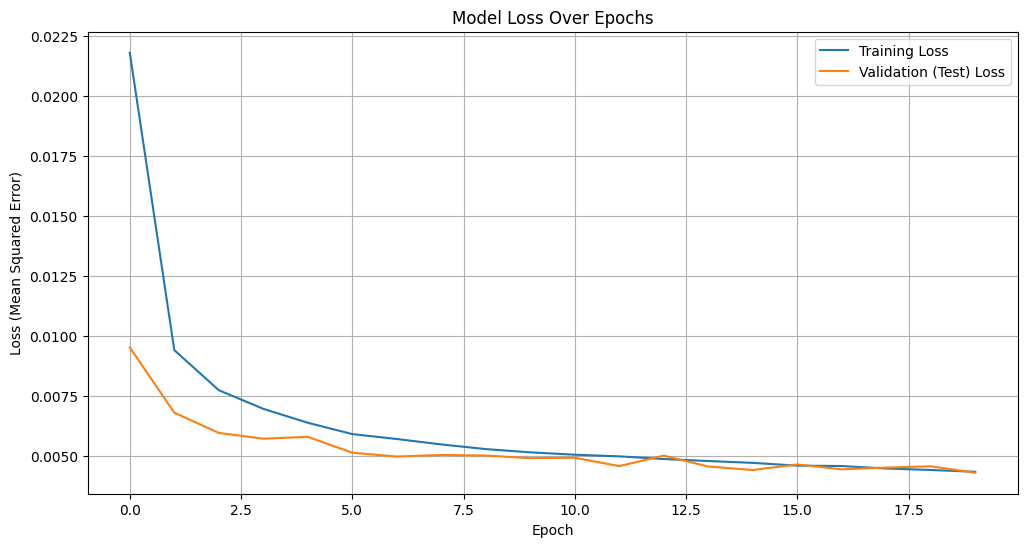

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation (Test) Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

302/302 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


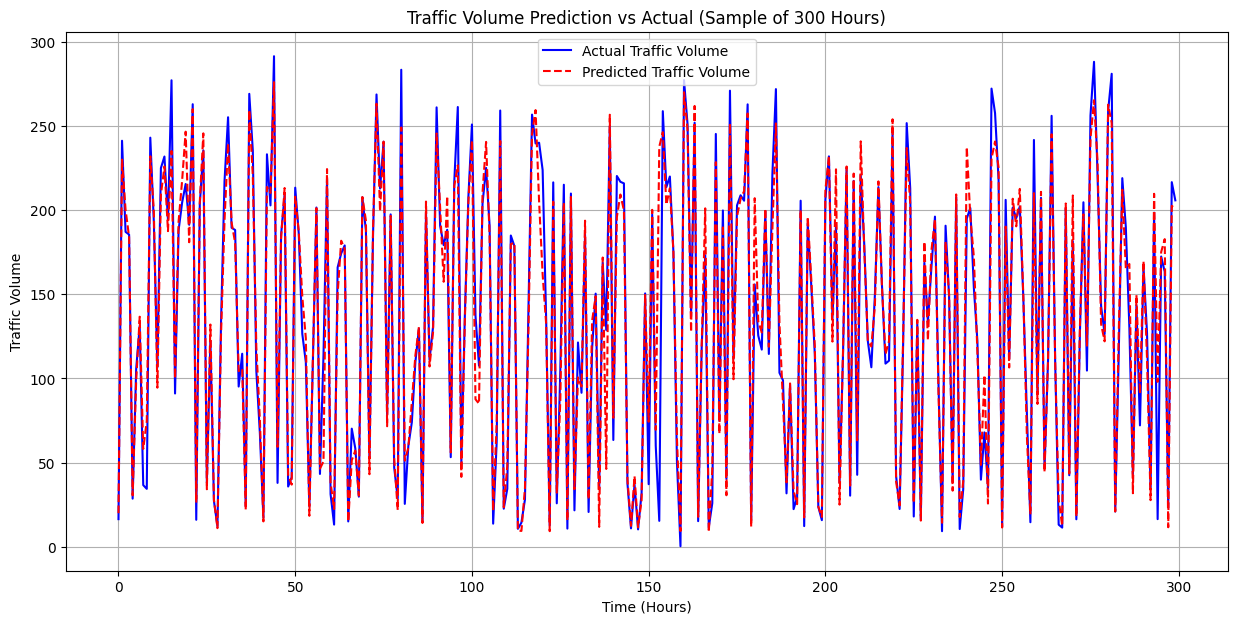

In [18]:
# --- 1. Make Predictions on the Test Data ---
predictions_scaled = model.predict(X_test)

# --- 2. Inverse Scale the Predictions and Actual Values ---
# We need to create a dummy array to inverse scale our single-column predictions
# The dummy array must have the same number of columns as the original scaler (65)
dummy_array = np.zeros((len(predictions_scaled), 65))

# Put our predictions into the first column (the traffic_volume column)
dummy_array[:, 0] = predictions_scaled.flatten()
predictions_unscaled = scaler.inverse_transform(dummy_array)[:, 0]

# Do the same for the actual values (y_test)
dummy_array[:, 0] = y_test.flatten()
y_test_unscaled = scaler.inverse_transform(dummy_array)[:, 0]


# --- 3. Plot the Results ---
plt.figure(figsize=(15, 7))
# We'll plot a sample of 300 hours to see the results clearly
plt.plot(y_test_unscaled[:300], color='blue', label='Actual Traffic Volume')
plt.plot(predictions_unscaled[:300], color='red', linestyle='--', label='Predicted Traffic Volume')

plt.title('Traffic Volume Prediction vs Actual (Sample of 300 Hours)')
plt.xlabel('Time (Hours)')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
import joblib

# --- Save the Trained Model ---
model.save('../src/traffic_model.keras')

# --- Save the Scaler ---
# The scaler is crucial because you need to process new data
# in the exact same way as the training data.
joblib.dump(scaler, '../src/data_scaler.gz')

print("Model and scaler have been saved successfully to the /src folder!")

Model and scaler have been saved successfully to the /src folder!


In [21]:
import joblib

# Saves the model to a file
model.save('../src/traffic_model.keras')

# Saves the scaler object to another file
joblib.dump(scaler, '../src/data_scaler.gz')

['../src/data_scaler.gz']